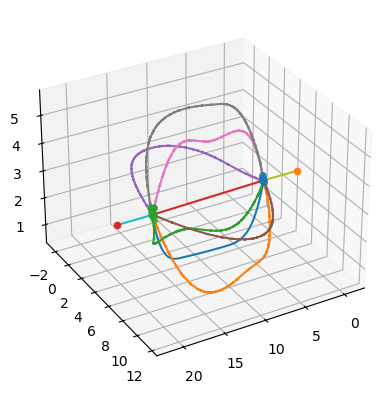

In [2]:
from fracprint import processor
from fracprint import writer

# File settings
filedir = './test_files/'       # Directory of the file you're loading
filename = '3Dblood27.11.txt'   # Name of the file you're loading
fileout = 'file.gcode'          # Name of the output file

# Print settings
d = 0.1                    # Target fibril diameter in mm
x_offset, y_offset = 0, 0  # Offset of the print from the origin
bed_temperature = 0       # Bed temperature in degrees C
floor = -61                # Lowest point on print
roof = 0                   # Height to retract printhead to at end of print
f_print = 200              # Printhead speed in mm / min

# Write to file
settings = processor.build_settings(filedir, filename, fileout, d, x_offset, y_offset, bed_temperature, floor, roof, f_print)
df, line_order_grouped = processor.shape_prep(settings)
df_print = writer.gcode_writer(df, settings, line_order_grouped)


In [3]:
df

,line_id,x,y,z,r,g,b,distance_from_last,x_shift,y_shift
0,2,18.111596,11.182686,2.986609,0,127,0,NaN,7.159206,0.447956
1,2,18.110164,11.386743,2.813780,0,127,0,0.267416,7.157774,0.652013
2,2,18.138710,11.315074,2.877408,0,127,0,0.099999,7.186320,0.580345
3,2,18.051130,11.532608,2.690350,0,127,0,0.299970,7.098741,0.797879
4,2,18.080977,11.459302,2.751467,0,127,0,0.099999,7.128587,0.724573
...,...,...,...,...,...,...,...,...,...,...
1819,9,4.000000,11.197390,3.047941,0,0,0,0.100000,-6.952390,0.462661
1820,9,4.100000,11.197390,3.047941,0,0,0,0.100000,-6.852390,0.462661
1821,9,4.200000,11.197390,3.047941,0,0,0,0.100000,-6.752390,0.462661
1822,9,4.300000,11.197390,3.047941,0,0,0,0.100000,-6.652390,0.462661
